## <b>APRIORI ALGO</b>

<b>IMPORT THE MODULES</b>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

<b>FUNCTIONS</b>

In [33]:
def gen_freq_itemsets(dataset, min_support):
    item_counts = {}
    
    # Count the occurrence of individual items
    for tnx in dataset:
        for item in tnx:
            if item in item_counts:
                item_counts[item] += 1
            else:
                item_counts[item] = 1
    
    # Identify frequent 1-itemsets
    freq_1_itemsets = {frozenset([item]) for item, count in item_counts.items() if count >= min_support}
    
    freq_itemsets = [freq_1_itemsets]
    k = 1
    
    while True:
        candidate_itemsets = gen_candidate_itemsets(freq_itemsets[k - 1], k)
        freq_itemsets_k = prune_infrequent(candidate_itemsets, dataset, min_support)
        
        if not freq_itemsets_k:
            break
        
        freq_itemsets.append(freq_itemsets_k)
        k += 1
    
    return freq_itemsets

def gen_candidate_itemsets(prev_freq_itemsets, k):
    candidates = set()
    
    for itemset1 in prev_freq_itemsets:
        for itemset2 in prev_freq_itemsets:
            if len(itemset1.union(itemset2)) == k + 1:
                candidates.add(itemset1.union(itemset2))
    
    return candidates

def prune_infrequent(candidate_itemsets, dataset, min_support):
    freq_itemsets = set()
    item_counts = {itemset: 0 for itemset in candidate_itemsets}
    
    for transaction in dataset:
        for itemset in candidate_itemsets:
            if itemset.issubset(transaction):
                item_counts[itemset] += 1
    
    for itemset, count in item_counts.items():
        if count >= min_support:
            freq_itemsets.add(itemset)
    
    return freq_itemsets

<b>DEFINE DATA</b>

In [34]:
dataset = [
    {"shoes", "hat", "gloves"},
    {"shoes", "jacket", "scarf", "hat"},
    {"gloves", "jacket", "tie", "watch"},
    {"shoes", "gloves", "jacket", "watch"},
    {"shoes", "hat", "gloves", "tie"}
]

min_support = 2
freq_itemsets = gen_freq_itemsets(dataset, min_support)

<b>PREPARE DATA FOR VIEW</b>

In [35]:
table_data = []
support_vals = []

for k, itemsets in enumerate(freq_itemsets, start=1):
    for itemset in itemsets:
        items_str = ', '.join(sorted(itemset))
        table_data.append([f"Frequent {k}-itemset", items_str])
        support_vals.append(len(itemset))

<b>VISUALIZE OUTCOMES</b>

In [39]:
print(tabulate(table_data, headers=["Itemset", "Items"]))

Itemset             Items
------------------  ---------------------
Frequent 1-itemset  watch
Frequent 1-itemset  gloves
Frequent 1-itemset  shoes
Frequent 1-itemset  tie
Frequent 1-itemset  hat
Frequent 1-itemset  jacket
Frequent 2-itemset  gloves, hat
Frequent 2-itemset  hat, shoes
Frequent 2-itemset  gloves, watch
Frequent 2-itemset  gloves, shoes
Frequent 2-itemset  jacket, watch
Frequent 2-itemset  gloves, jacket
Frequent 2-itemset  gloves, tie
Frequent 2-itemset  jacket, shoes
Frequent 3-itemset  gloves, jacket, watch
Frequent 3-itemset  gloves, hat, shoes


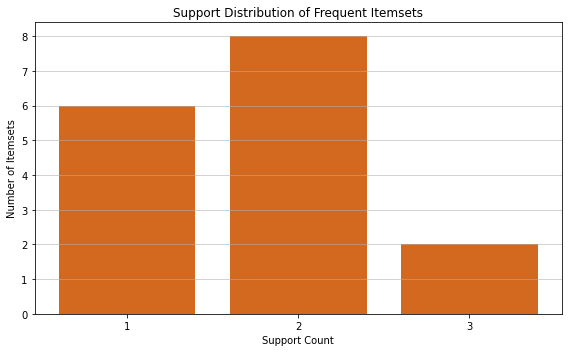

In [49]:
plt.figure(figsize=(8, 5))
plt.hist(support_vals, bins=range(min(support_vals), max(support_vals) + 2), align='left', rwidth=0.8, color='chocolate')
plt.xlabel('Support Count')
plt.ylabel('Number of Itemsets')
plt.title('Support Distribution of Frequent Itemsets')
plt.xticks(range(min(support_vals), max(support_vals) + 1))
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

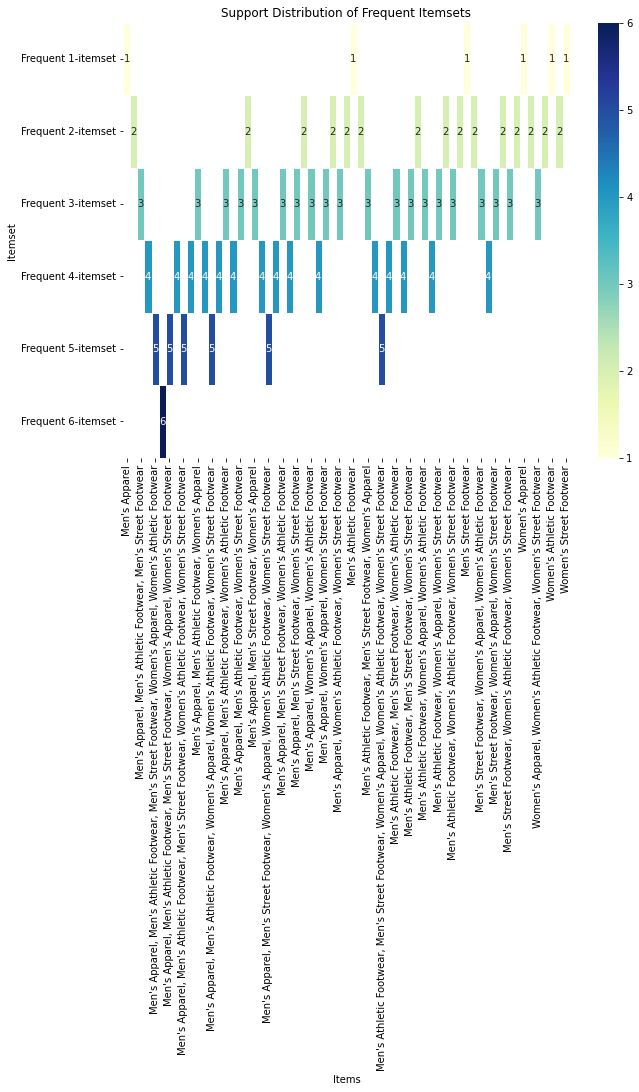

In [50]:
df = pd.read_csv('data/Adidas_US_Sales_Datasets.csv')

tnx = df.groupby('Invoice Date')['Product'].apply(list).tolist()

min_support = 2

freq_itemsets = gen_freq_itemsets(tnx, min_support)

# Prepare data for heatmap
heatmap_data = []
support_vals = []
for k, itemsets in enumerate(freq_itemsets, start=1):
    for itemset in itemsets:
        support_vals.append(len(itemset))
        items_str = ', '.join(sorted(itemset))
        heatmap_data.append([f"Frequent {k}-itemset", items_str, len(itemset)])

# Create a DataFrame for the heatmap
heatmap_df = pd.DataFrame(heatmap_data, columns=["Itemset", "Items", "Support Count"])

# Pivot the DataFrame for the heatmap
heatmap_pivot = heatmap_df.pivot("Itemset", "Items", "Support Count")

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_pivot, cmap="YlGnBu", annot=True, linewidths=0.5, annot_kws={"size": 10})
plt.title("Support Distribution of Frequent Itemsets")
plt.xlabel("Items")
plt.ylabel("Itemset")
plt.show()

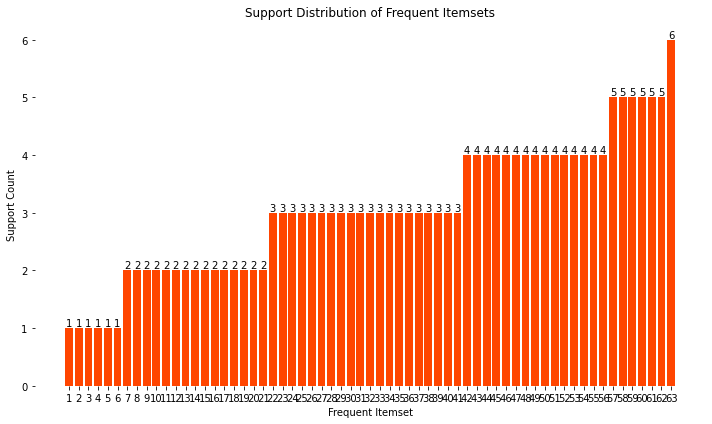

In [53]:
plt.figure(figsize=(10, 6))
bars = plt.bar(range(1, len(support_values) + 1), support_values, color='orangered')
plt.xlabel('Frequent Itemset')
plt.ylabel('Support Count')
plt.title('Support Distribution of Frequent Itemsets')

plt.gca().spines[['top', 'right', 'bottom', 'left']].set_visible(False)

# Display the support count on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom')

plt.xticks(range(1, len(support_values) + 1))
plt.tight_layout()
plt.show()